In [ ]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.6.0-cp39-cp39-manylinux2010_x86_64.whl (458.4 MB)
  Using cached numpy-1.19.5-cp39-cp39-manylinux2010_x86_64.whl (14.9 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: tensorflow
    Found existin

# brain

In [2]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/brain_net")

In [5]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        print(filename)
        data.append(filename)

In [6]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

2870

In [7]:
#creating dictionary of flower species
flower_images_dict={
    "glioma":list(directory.glob('glioma_tumor/*.jpg')),
    "meningioma":list(directory.glob('meningioma_tumor/*.jpg')),
    "no":list(directory.glob('no_tumor/*.jpg')),
    "pituitary":list(directory.glob('pituitary_tumor/*.jpg'))
}

In [8]:
flower_images_dict

{'glioma': [PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (400).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (419).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (417).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (442).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (427).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (37).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (404).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (385).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (439).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (375).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (377).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (39).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (437).jpg'),
  PosixPath('/con

In [9]:
#Different species list
keys=["glioma","meningioma","no","pituitary"]

In [10]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed


{'glioma': [PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (400).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (419).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (417).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (442).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (427).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (37).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (404).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (385).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (439).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (375).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (377).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (39).jpg'),
  PosixPath('/content/drive/MyDrive/brain_net/glioma_tumor/gg (437).jpg'),
  PosixPath('/con

In [11]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [12]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give 
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

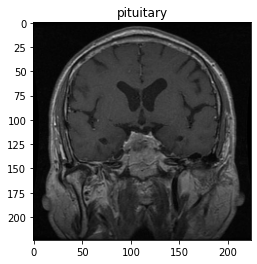

In [13]:
print_image(x_train[15],y_train[15])

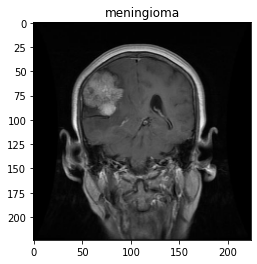

In [14]:
print_image(x_test[6],y_test[6])

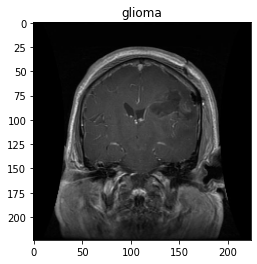

In [15]:
print_image(x_test[1],y_test[1])

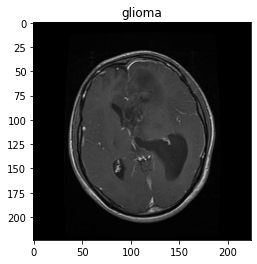

In [16]:
print_image(x_train[16],y_train[16])

In [17]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [18]:
x_train_scaled.shape

(2152, 224, 224, 3)

In [19]:
y_train=np.array(y_train)
y_train.shape

(2152,)

#adam

In [19]:
#Simple CNN Model

In [20]:
#adam
model=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [23]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

In [22]:
history=model.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 12s 25ms/step - loss: 1.9948 - accuracy: 0.5288
Epoch 2/100
68/68 [==============================] - 2s 25ms/step - loss: 0.4722 - accuracy: 0.8202
Epoch 3/100
68/68 [==============================] - 2s 28ms/step - loss: 0.2191 - accuracy: 0.9303
Epoch 4/100
68/68 [==============================] - 2s 27ms/step - loss: 0.0981 - accuracy: 0.9772
Epoch 5/100
68/68 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9958call

Reached 99.00% accuracy, so stopping training!!
68/68 [==============================] - 2s 24ms/step - loss: 0.0361 - accuracy: 0.9958


In [23]:
model.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 15ms/step - loss: 0.4364 - accuracy: 0.8607


[0.43644896149635315, 0.8607242107391357]

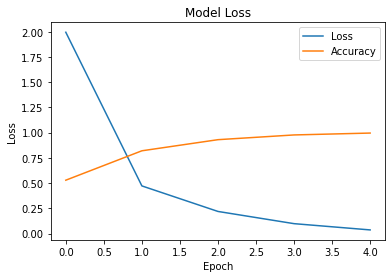

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

In [25]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 34.1 MB/s eta 0:00:00


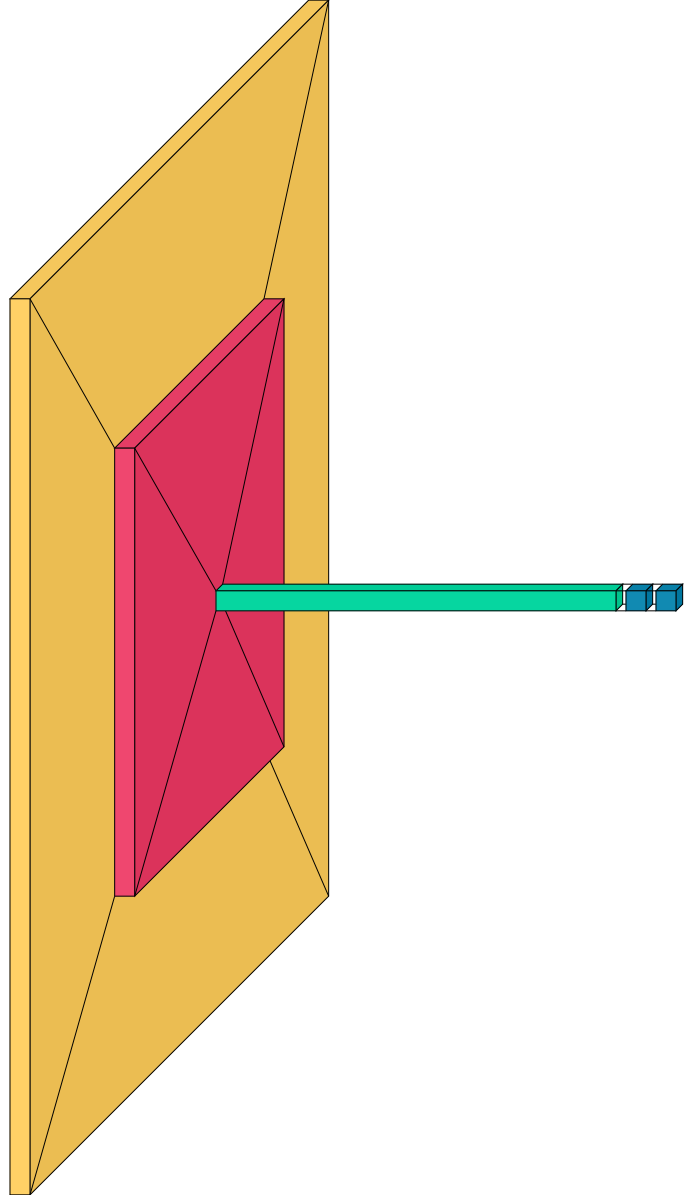

In [26]:
import visualkeras
visualkeras.layered_view(model)

In [27]:
#CNN Model With Data Augumentation layers and Dropout layers

In [28]:
model1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model1.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [29]:
history=model1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 13s 133ms/step - loss: 2.2311 - accuracy: 0.3104
Epoch 2/100
68/68 [==============================] - 11s 156ms/step - loss: 1.3261 - accuracy: 0.3448
Epoch 3/100
68/68 [==============================] - 7s 107ms/step - loss: 1.2811 - accuracy: 0.3866
Epoch 4/100
68/68 [==============================] - 6s 82ms/step - loss: 1.2439 - accuracy: 0.4164
Epoch 5/100
68/68 [==============================] - 7s 99ms/step - loss: 1.1989 - accuracy: 0.4493
Epoch 6/100
68/68 [==============================] - 6s 90ms/step - loss: 1.1572 - accuracy: 0.4582
Epoch 7/100
68/68 [==============================] - 6s 84ms/step - loss: 1.0897 - accuracy: 0.4916
Epoch 8/100
68/68 [==============================] - 7s 102ms/step - loss: 1.0630 - accuracy: 0.5065
Epoch 9/100
68/68 [==============================] - 6s 82ms/step - loss: 1.0011 - accuracy: 0.5441
Epoch 10/100
68/68 [==============================] - 7s 105ms/step - loss: 0.9794 - accuracy: 0.5451
Epoc

In [30]:
model1.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 15ms/step - loss: 0.5793 - accuracy: 0.8036


[0.5792849063873291, 0.8036211729049683]

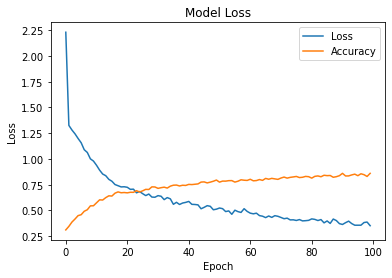

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

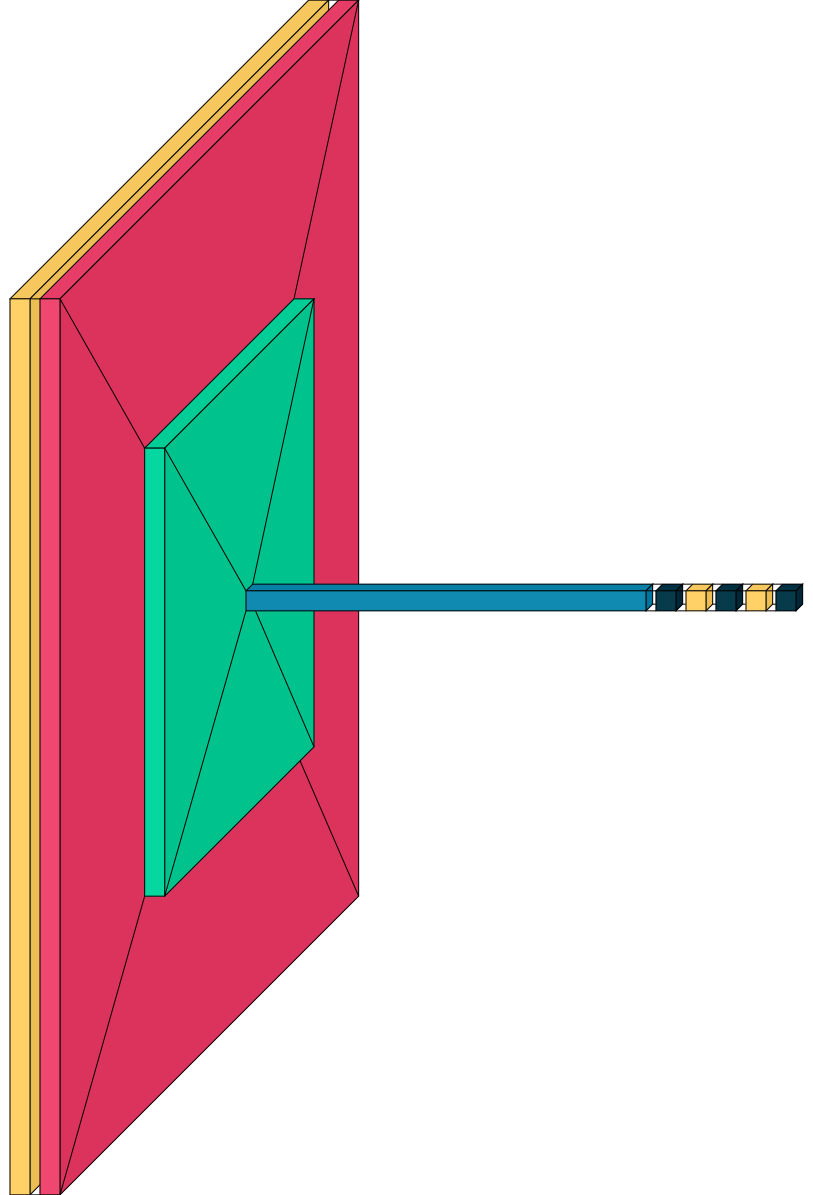

In [32]:
visualkeras.layered_view(model1)

#adadelta

In [24]:
#adadelta

In [25]:
model2=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model2.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
history=model2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 11s 25ms/step - loss: 1.3079 - accuracy: 0.4261
Epoch 2/100
68/68 [==============================] - 2s 24ms/step - loss: 1.1902 - accuracy: 0.5274
Epoch 3/100
68/68 [==============================] - 2s 24ms/step - loss: 1.1185 - accuracy: 0.5544
Epoch 4/100
68/68 [==============================] - 2s 25ms/step - loss: 1.0679 - accuracy: 0.5767
Epoch 5/100
68/68 [==============================] - 2s 28ms/step - loss: 1.0252 - accuracy: 0.5957
Epoch 6/100
68/68 [==============================] - 2s 28ms/step - loss: 0.9910 - accuracy: 0.5999
Epoch 7/100
68/68 [==============================] - 2s 24ms/step - loss: 0.9587 - accuracy: 0.6115
Epoch 8/100
68/68 [==============================] - 2s 24ms/step - loss: 0.9304 - accuracy: 0.6310
Epoch 9/100
68/68 [==============================] - 2s 24ms/step - loss: 0.9079 - accuracy: 0.6375
Epoch 10/100
68/68 [==============================] - 2s 24ms/step - loss: 0.8843 - accuracy: 0.652

In [27]:
model2.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 19ms/step - loss: 0.6300 - accuracy: 0.7841


[0.629960834980011, 0.7841225862503052]

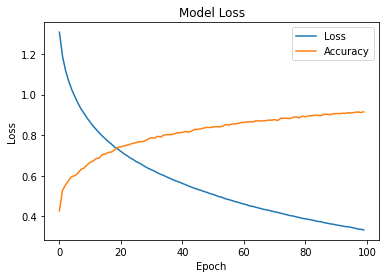

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

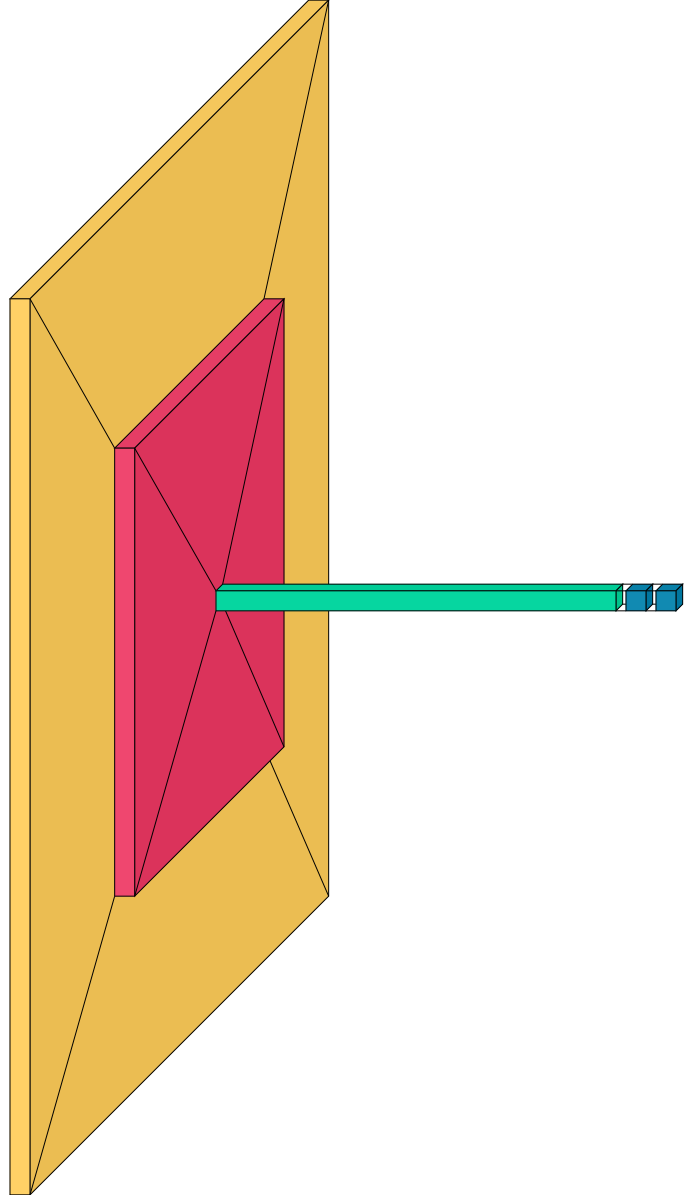

In [29]:
import visualkeras
visualkeras.layered_view(model2)

In [30]:
#model 2
model3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model3.compile(
optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [31]:
history=model3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 10s 83ms/step - loss: 1.3808 - accuracy: 0.2983
Epoch 2/100
68/68 [==============================] - 6s 95ms/step - loss: 1.3533 - accuracy: 0.3643
Epoch 3/100
68/68 [==============================] - 6s 89ms/step - loss: 1.3359 - accuracy: 0.3690
Epoch 4/100
68/68 [==============================] - 6s 83ms/step - loss: 1.3322 - accuracy: 0.3755
Epoch 5/100
68/68 [==============================] - 7s 103ms/step - loss: 1.3154 - accuracy: 0.3945
Epoch 6/100
68/68 [==============================] - 6s 82ms/step - loss: 1.3153 - accuracy: 0.4029
Epoch 7/100
68/68 [==============================] - 7s 107ms/step - loss: 1.3080 - accuracy: 0.4029
Epoch 8/100
68/68 [==============================] - 6s 83ms/step - loss: 1.3043 - accuracy: 0.3917
Epoch 9/100
68/68 [==============================] - 7s 106ms/step - loss: 1.2980 - accuracy: 0.4015
Epoch 10/100
68/68 [==============================] - 6s 83ms/step - loss: 1.2975 - accuracy: 0.3941
Epoch 1

In [32]:
model3.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 15ms/step - loss: 1.0016 - accuracy: 0.6128


[1.0016087293624878, 0.6128133535385132]

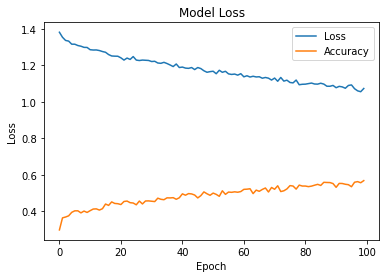

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

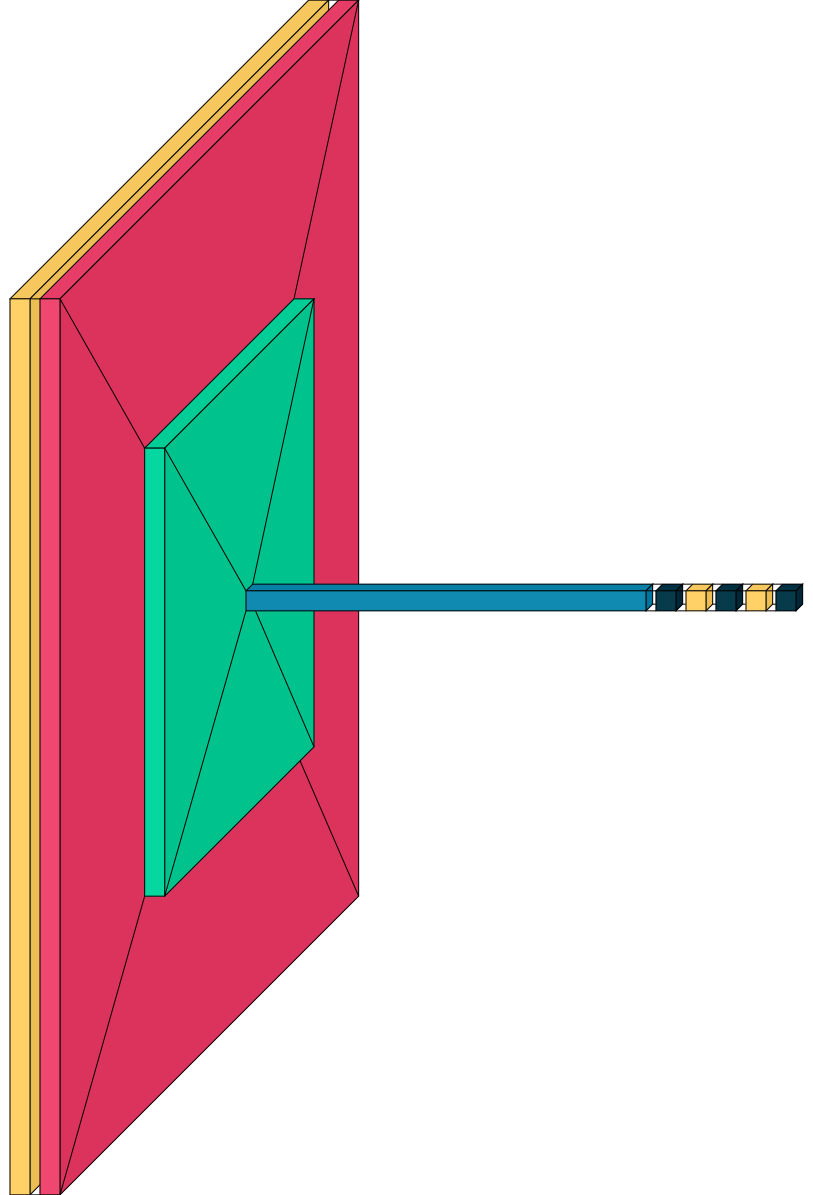

In [34]:
visualkeras.layered_view(model3)

#adagrad

In [1]:
#simple cnn model
model4=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model4.compile(
optimizer="adagrad",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

NameError: ignored

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history=model4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 13s 25ms/step - loss: 1.1884 - accuracy: 0.4916
Epoch 2/100
68/68 [==============================] - 2s 29ms/step - loss: 0.9831 - accuracy: 0.6125
Epoch 3/100
68/68 [==============================] - 2s 27ms/step - loss: 0.8750 - accuracy: 0.6436
Epoch 4/100
68/68 [==============================] - 2s 28ms/step - loss: 0.7924 - accuracy: 0.6863
Epoch 5/100
68/68 [==============================] - 2s 26ms/step - loss: 0.7302 - accuracy: 0.7189
Epoch 6/100
68/68 [==============================] - 2s 27ms/step - loss: 0.6901 - accuracy: 0.7300
Epoch 7/100
68/68 [==============================] - 2s 29ms/step - loss: 0.6297 - accuracy: 0.7649
Epoch 8/100
68/68 [==============================] - 2s 25ms/step - loss: 0.5816 - accuracy: 0.7886
Epoch 9/100
68/68 [==============================] - 2s 28ms/step - loss: 0.6005 - accuracy: 0.7704
Epoch 10/100
68/68 [==============================] - 2s 27ms/step - loss: 0.5401 - accuracy: 0.786

In [ ]:
model4.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 19ms/step - loss: 0.6112 - accuracy: 0.8078


[0.6111657023429871, 0.8077994585037231]

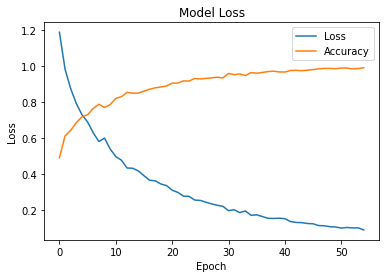

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

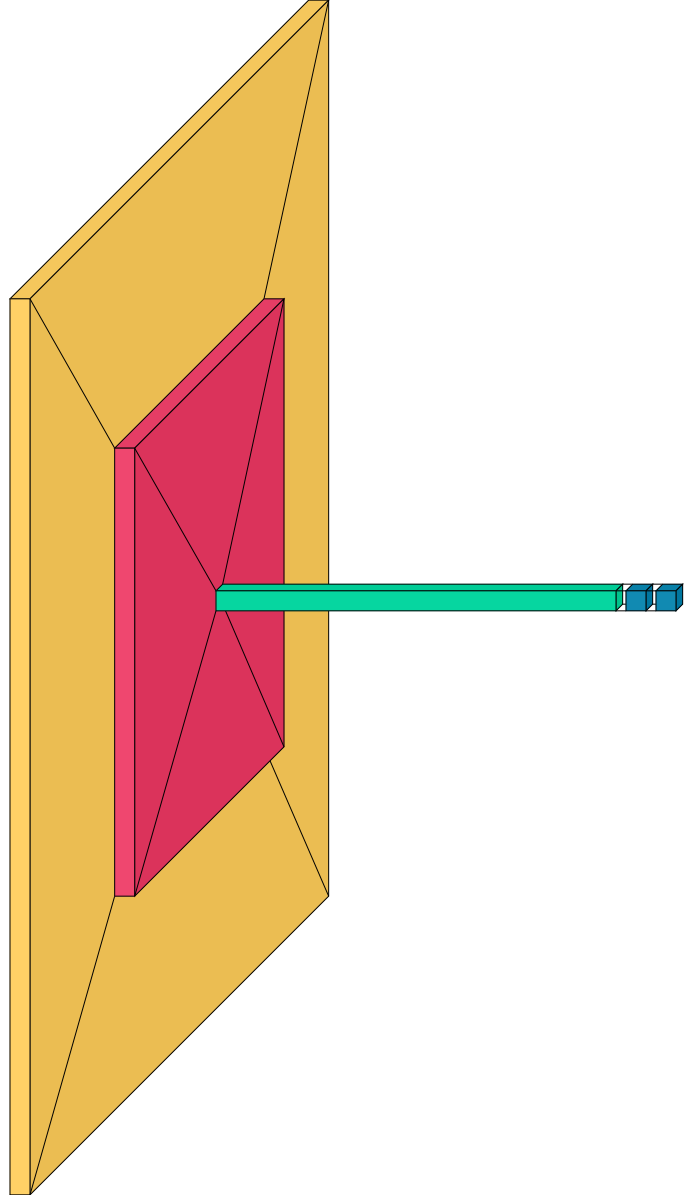

In [ ]:
import visualkeras
visualkeras.layered_view(model4)

In [ ]:
#model 2
model5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model5.compile(
optimizer="adagrad",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 10s 85ms/step - loss: 1.3367 - accuracy: 0.3615
Epoch 2/100
68/68 [==============================] - 7s 98ms/step - loss: 1.2971 - accuracy: 0.3922
Epoch 3/100
68/68 [==============================] - 7s 101ms/step - loss: 1.2829 - accuracy: 0.4015
Epoch 4/100
68/68 [==============================] - 7s 98ms/step - loss: 1.2720 - accuracy: 0.4145
Epoch 5/100
68/68 [==============================] - 7s 96ms/step - loss: 1.2299 - accuracy: 0.4540
Epoch 6/100
68/68 [==============================] - 6s 85ms/step - loss: 1.2214 - accuracy: 0.4489
Epoch 7/100
68/68 [==============================] - 7s 108ms/step - loss: 1.2012 - accuracy: 0.4600
Epoch 8/100
68/68 [==============================] - 6s 86ms/step - loss: 1.1885 - accuracy: 0.4721
Epoch 9/100
68/68 [==============================] - 7s 109ms/step - loss: 1.1735 - accuracy: 0.4791
Epoch 10/100
68/68 [==============================] - 6s 86ms/step - loss: 1.1493 - accuracy: 0.4772
Epoch 1

In [ ]:
model5.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 0s 15ms/step - loss: 0.6655 - accuracy: 0.7284


[0.6655305624008179, 0.7284122705459595]

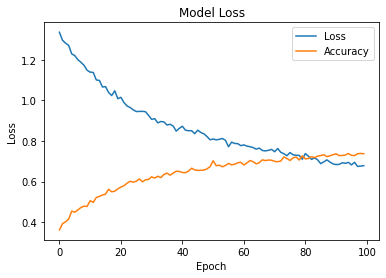

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

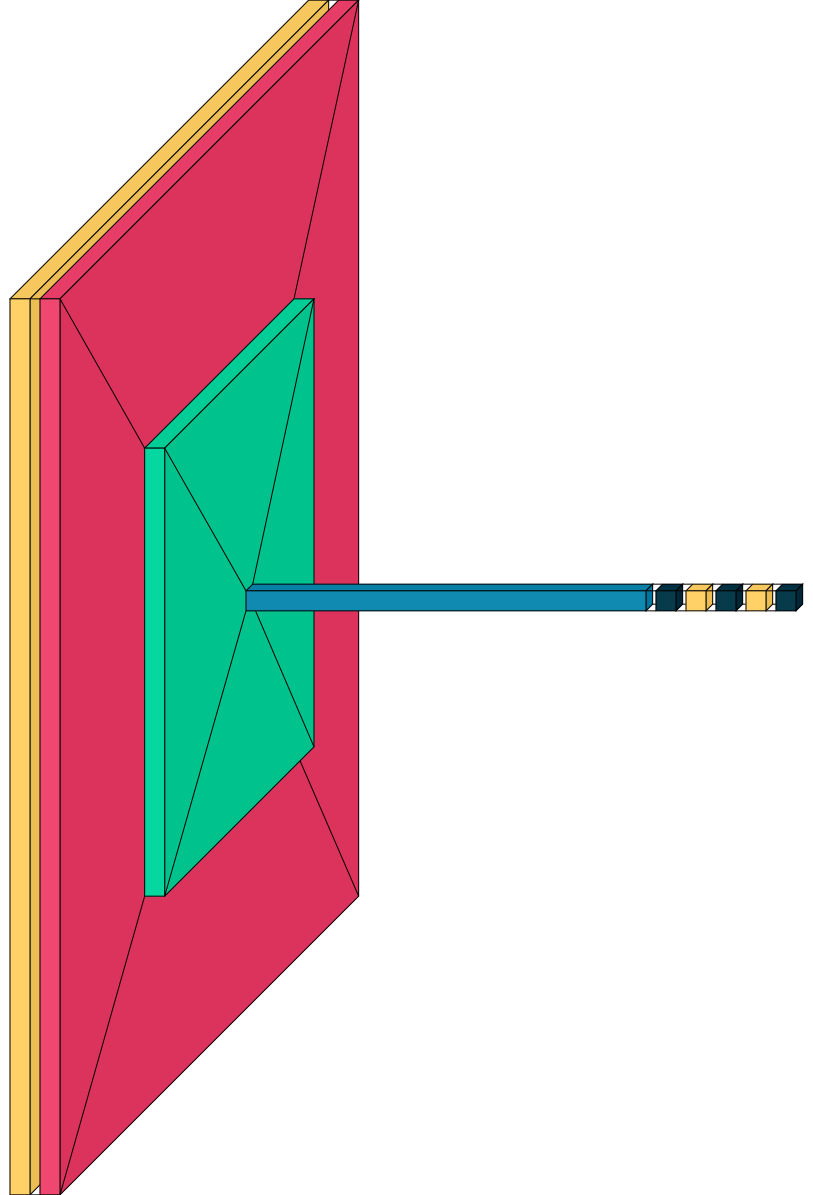

In [ ]:
visualkeras.layered_view(model5)

#RMSprop


In [ ]:
#simple cnn model
model6=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(4,activation="softmax")])
model6.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model6.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 3s 24ms/step - loss: 3.5445 - accuracy: 0.5195
Epoch 2/100
68/68 [==============================] - 2s 23ms/step - loss: 0.6683 - accuracy: 0.7370
Epoch 3/100
68/68 [==============================] - 2s 24ms/step - loss: 0.4042 - accuracy: 0.8583
Epoch 4/100
68/68 [==============================] - 2s 23ms/step - loss: 0.2333 - accuracy: 0.9266
Epoch 5/100
68/68 [==============================] - 2s 24ms/step - loss: 0.1405 - accuracy: 0.9614
Epoch 6/100
68/68 [==============================] - 2s 28ms/step - loss: 0.0739 - accuracy: 0.9800
Epoch 7/100
68/68 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9921call

Reached 99.00% accuracy, so stopping training!!
68/68 [==============================] - 2s 27ms/step - loss: 0.0379 - accuracy: 0.9921


In [ ]:
model6.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 0s 15ms/step - loss: 0.5260 - accuracy: 0.8357


[0.526004433631897, 0.835654616355896]

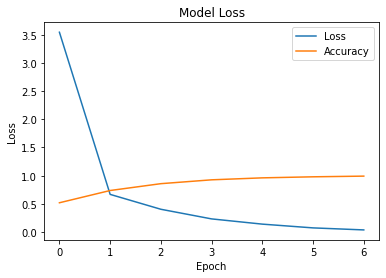

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

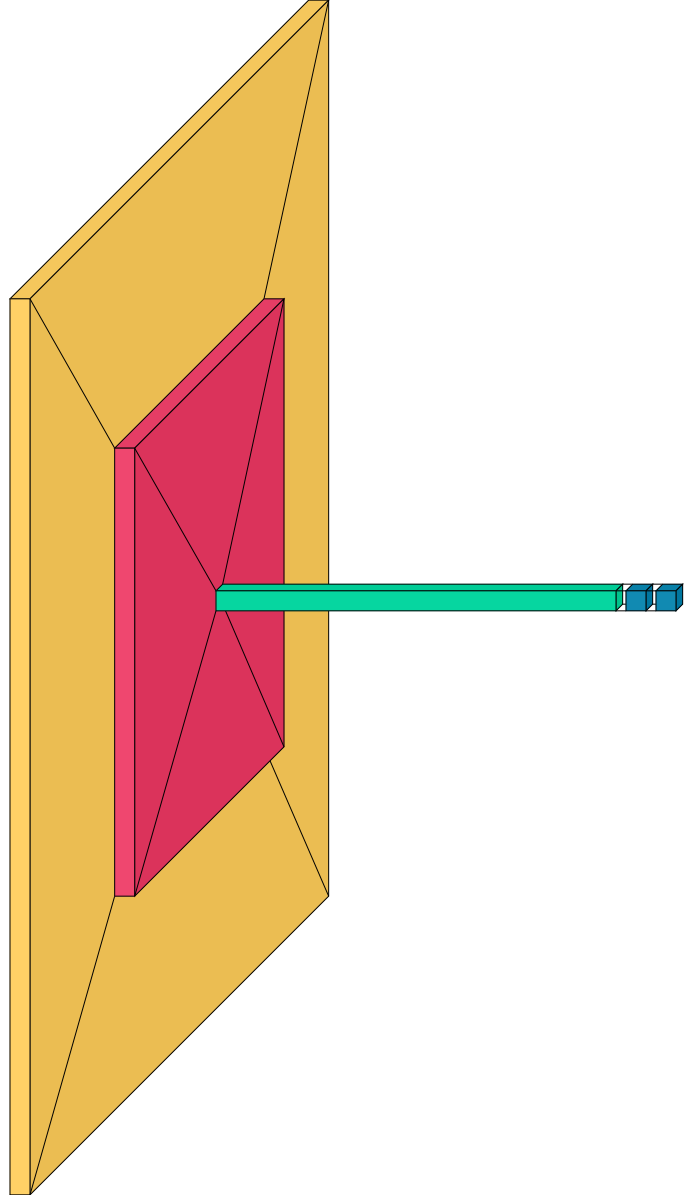

In [ ]:
visualkeras.layered_view(model6)

In [ ]:
#model 2
model7=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model7.compile(
optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model7.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 9s 84ms/step - loss: 2.0037 - accuracy: 0.3546
Epoch 2/100
68/68 [==============================] - 7s 106ms/step - loss: 1.2025 - accuracy: 0.4456
Epoch 3/100
68/68 [==============================] - 6s 84ms/step - loss: 1.0678 - accuracy: 0.5209
Epoch 4/100
68/68 [==============================] - 7s 101ms/step - loss: 0.9523 - accuracy: 0.5771
Epoch 5/100
68/68 [==============================] - 6s 90ms/step - loss: 0.9002 - accuracy: 0.6115
Epoch 6/100
68/68 [==============================] - 6s 92ms/step - loss: 0.8314 - accuracy: 0.6422
Epoch 7/100
68/68 [==============================] - 7s 107ms/step - loss: 0.7984 - accuracy: 0.6622
Epoch 8/100
68/68 [==============================] - 6s 84ms/step - loss: 0.7668 - accuracy: 0.6701
Epoch 9/100
68/68 [==============================] - 7s 108ms/step - loss: 0.7596 - accuracy: 0.6863
Epoch 10/100
68/68 [==============================] - 10s 152ms/step - loss: 0.6940 - accuracy: 0.7096
Epoch

In [ ]:
model7.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 0s 15ms/step - loss: 0.9149 - accuracy: 0.8635


[0.9149365425109863, 0.8635097742080688]

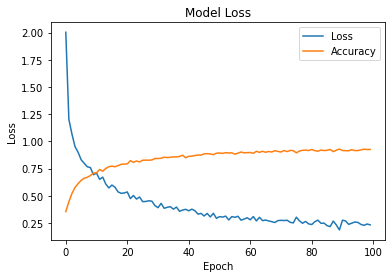

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

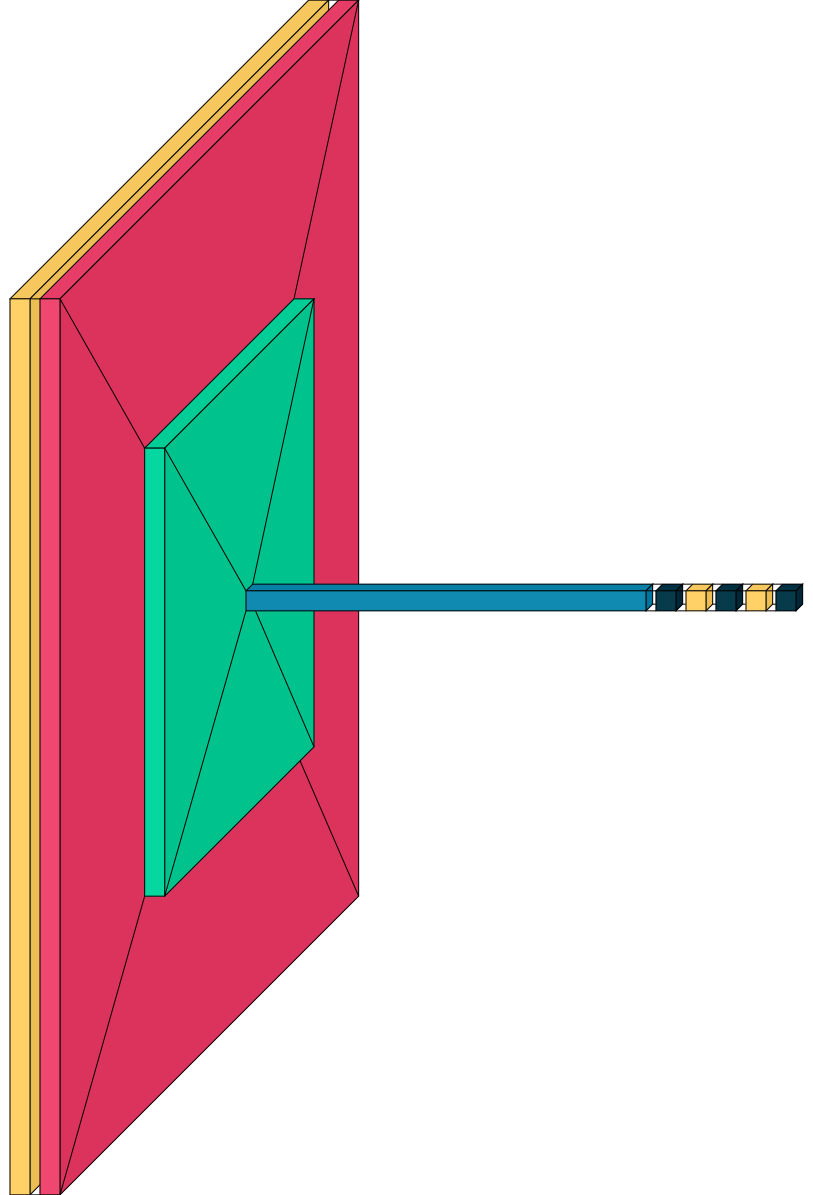

In [ ]:
visualkeras.layered_view(model7)